In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
alt.renderers.enable('notebook')
import scipy.stats as stat 
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn
import statsmodels.api as sm

In [285]:
data = pd.read_csv('telco.tsv',delimiter="\t")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null object
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null object
employ     1000 non-null int64
retire     1000 non-null object
gender     1000 non-null object
longmon    1000 non-null float64
wiremon    1000 non-null float64
churn      1000 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 74.3+ KB


,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
0,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes
1,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes
2,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No
3,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes
4,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,Unmarried,0,27,Some college,0,No,Female,3.00,0.0,No
996,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,4.65,0.0,No
997,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,26.75,65.8,No
998,70,49,Unmarried,18,87,High school degree,22,No,Female,25.60,0.0,No


 
**1.** Have a closer look at the definitions of the variables and analyze which of them might
require a separate treatment. Consider for example the variable ed. There are two
possibilities how the variable ed can be included into the model (one with dummy
variables, the other one without dummies). Think about these two approaches and
suggest which approach is more appropriate. Motivate your decision.


Comments on how to include data into the model

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. 
<br><br>
There are many types of data treatment. Dummy variables allows us to introduce K-1 columns with 0 or 1 value, where K is the number of categories. Another chance is to just code categories with numbers. Second approcah will "fool the regression", as the last category will have more value\weight than the first. This brings the conclusion, that we need to introduce 4 columns of dummy variable (shown in cell below), because we have 5 types of categories. This is done to avoid Dummy-trap, or multicolinearity. It's obvious if the first 4 columns have zero the left one is 1.<br>
Also, our dataset has colums that should be also converted to dummies, those columns are **marital, retire, gender, churn.**<br>
!!!difference between school-college will be same, but if we make it categorical college and scooll will be more distinct

In [287]:
# function that generates K-1 dummies.
def convert_to_dummies(data):
    just_dummies = pd.get_dummies(data,
                                  columns=['marital', 'retire', 'gender', 'churn', 'ed'],
                                  drop_first=True)
    return just_dummies


data = convert_to_dummies(data)
data.head()

,tenure,age,address,income,employ,longmon,wiremon,wiremon_binary,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,3.70,0.0,0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,4.40,35.7,1,0,0,1,1,0,0,1,0
2,68,52,24,116,29,18.15,0.0,0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,9.45,0.0,0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,6.30,0.0,0,0,0,1,0,1,0,0,0


**2** Consider now the dependent variable and the interval (metric) scaled explanatory
variables. Plot these data and decide if you wish to transform these x-variables and if
there is a need to transform the y variable. You can also use some measure of skewness
to decide about y. The variable wiremon shows a very specific pattern. How would
you take it into account?

2.961653118665478

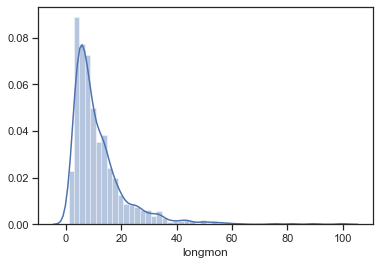

In [288]:
ax = sns.distplot(data.longmon)
skew(data.longmon)

The data is skewed to the right (skewness value > 0, so data is right-skewed) and by taking the log of it we get data that is almost 0-skewed

0.16619428694170782

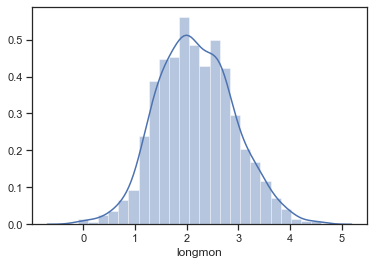

In [289]:
#add log
ax = sns.distplot(np.log(data.longmon))
skew(np.log(data.longmon))

In [290]:
data

,tenure,age,address,income,employ,longmon,wiremon,wiremon_binary,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,3.70,0.0,0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,4.40,35.7,1,0,0,1,1,0,0,1,0
2,68,52,24,116,29,18.15,0.0,0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,9.45,0.0,0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,6.30,0.0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,3.00,0.0,0,1,0,0,0,0,0,0,1
996,7,34,2,22,5,4.65,0.0,0,1,0,0,0,0,0,1,0
997,67,59,40,944,33,26.75,65.8,1,1,0,0,0,0,0,1,0
998,70,49,18,87,22,25.60,0.0,0,1,0,0,0,0,1,0,0


In [270]:
#include this in data



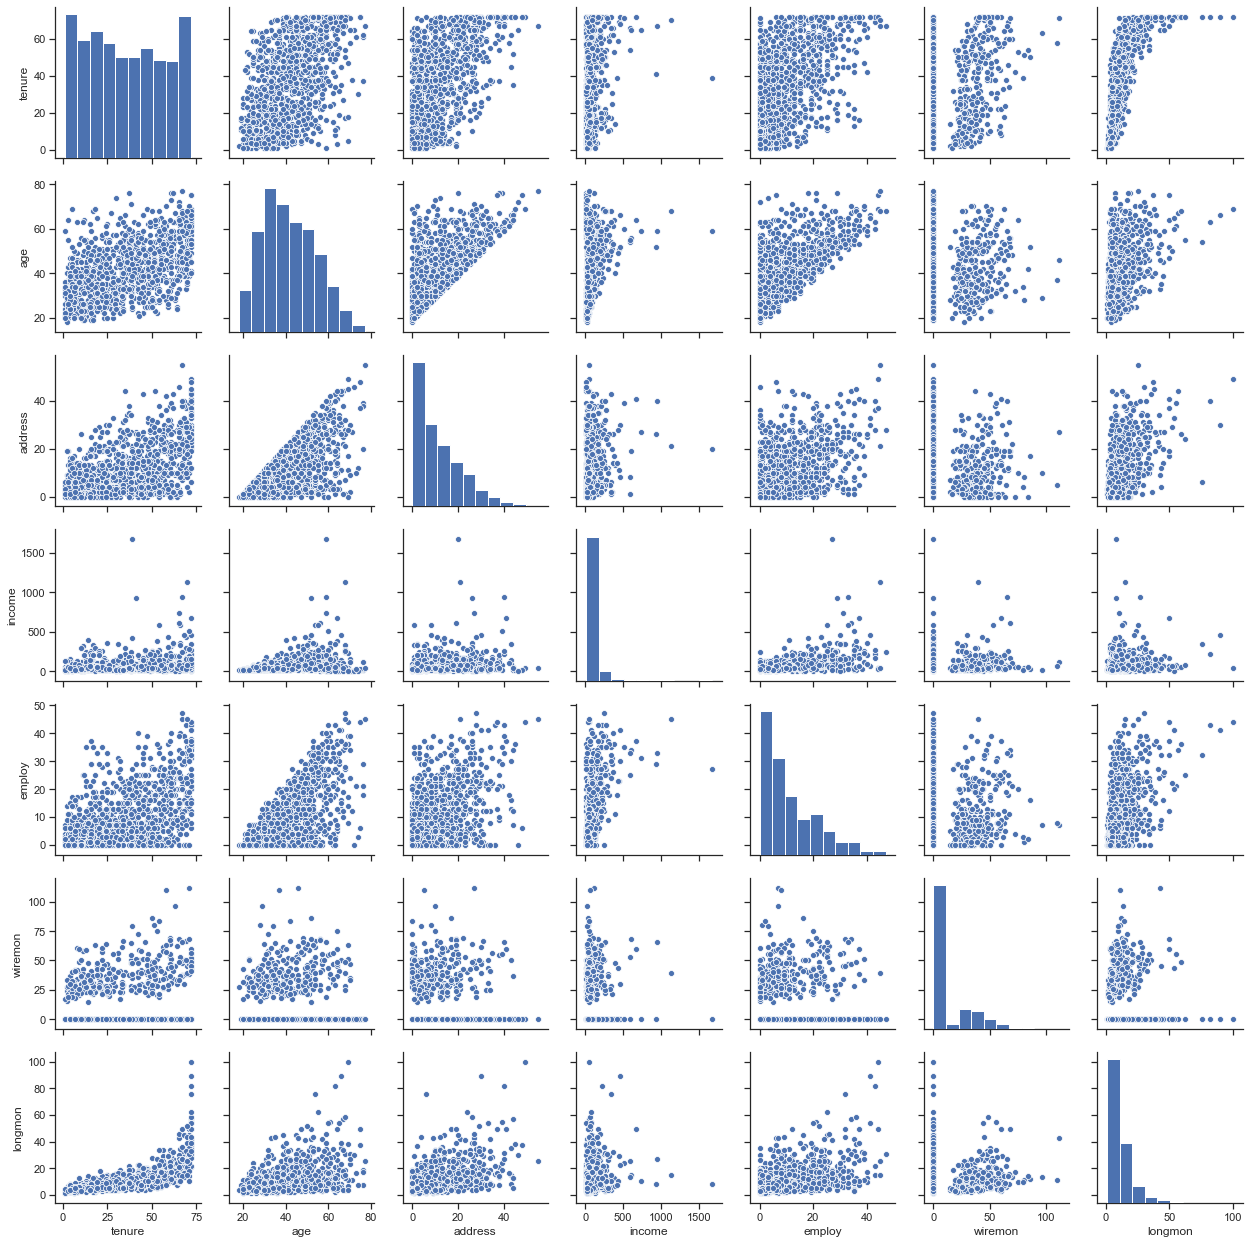

In [271]:
g = sns.pairplot(data,
                 vars=[
                     'tenure', 'age', 'address', 'income', 'employ', 'wiremon',
                     'longmon'
                 ])

In [272]:
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s
def check_skewness(X):
    print("skew = {:g}".format(skew(X)))

In [273]:
print('tenure: ')
check_skewness(data.tenure)
print('age: ')
check_skewness(data.age)
print('address: ')
check_skewness(data.address)
print('income: ')
check_skewness(data.income)
print('employ: ')
check_skewness(data.employ)
print('wiremon: ')
check_skewness(data.wiremon)
print('longmon: ')
check_skewness(data.longmon)

tenure: 
skew = 0.111692
age: 
skew = 0.356128
address: 
skew = 1.10459
income: 
skew = 6.6333
employ: 
skew = 1.05946
wiremon: 
skew = 1.60127
longmon: 
skew = 2.96165


so, data need transfromations those values that have skewness not near 0, and wiremon needs transformation to binary as it can be described as people who dont use internet and other, as there are a lot of 0, so it can be changed

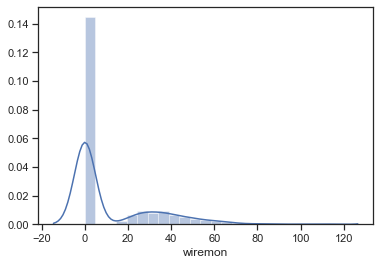

In [274]:
ax = sns.distplot(data.wiremon)

In [275]:
# apply transform and check skewness
print('tenure_log: ')
check_skewness(data.tenure)
print('age: ')
check_skewness(data.age)
print('address_sqrt: ')
check_skewness(np.sqrt(data.address))
print('income_log: ')
check_skewness(np.log(data.income))
print('employ_sqrt: ')
check_skewness(np.sqrt(data.employ))
print('longmon: ')
check_skewness(data.longmon)

tenure_log: 
skew = 0.111692
age: 
skew = 0.356128
address_sqrt: 
skew = 0.0970388
income_log: 
skew = 0.700293
employ_sqrt: 
skew = 0.0216799
longmon: 
skew = 2.96165


In [291]:
#make wiremon binary
data_transformed = data
data_transformed['wiremon_binary'] = data_transformed['wiremon'].apply(lambda x: 1 if x != 0 else 0)
data_transformed = data_transformed.drop('wiremon', axis=1)
data_transformed.address = np.sqrt(data_transformed.address)
data_transformed.income = np.log(data_transformed.income)
data_transformed.employ = np.sqrt(data_transformed.employ)
data_transformed.longmon = np.log(data_transformed.longmon)
data_transformed

,tenure,age,address,income,employ,longmon,wiremon_binary,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,3.000000,4.158883,2.236068,1.308333,0,0,0,1,1,0,0,0,0
1,11,33,2.645751,4.912655,2.236068,1.481605,1,0,0,1,1,0,0,1,0
2,68,52,4.898979,4.753590,5.385165,2.898671,0,0,0,0,0,1,0,0,0
3,33,33,3.464102,3.496508,0.000000,2.246015,0,1,0,0,1,0,1,0,0
4,23,30,3.000000,3.401197,1.414214,1.840550,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0.000000,3.295837,0.000000,1.098612,0,1,0,0,0,0,0,0,1
996,7,34,1.414214,3.091042,2.236068,1.536867,0,1,0,0,0,0,0,1,0
997,67,59,6.324555,6.850126,5.744563,3.286534,1,1,0,0,0,0,0,1,0
998,70,49,4.242641,4.465908,4.690416,3.242592,0,1,0,0,0,0,1,0,0


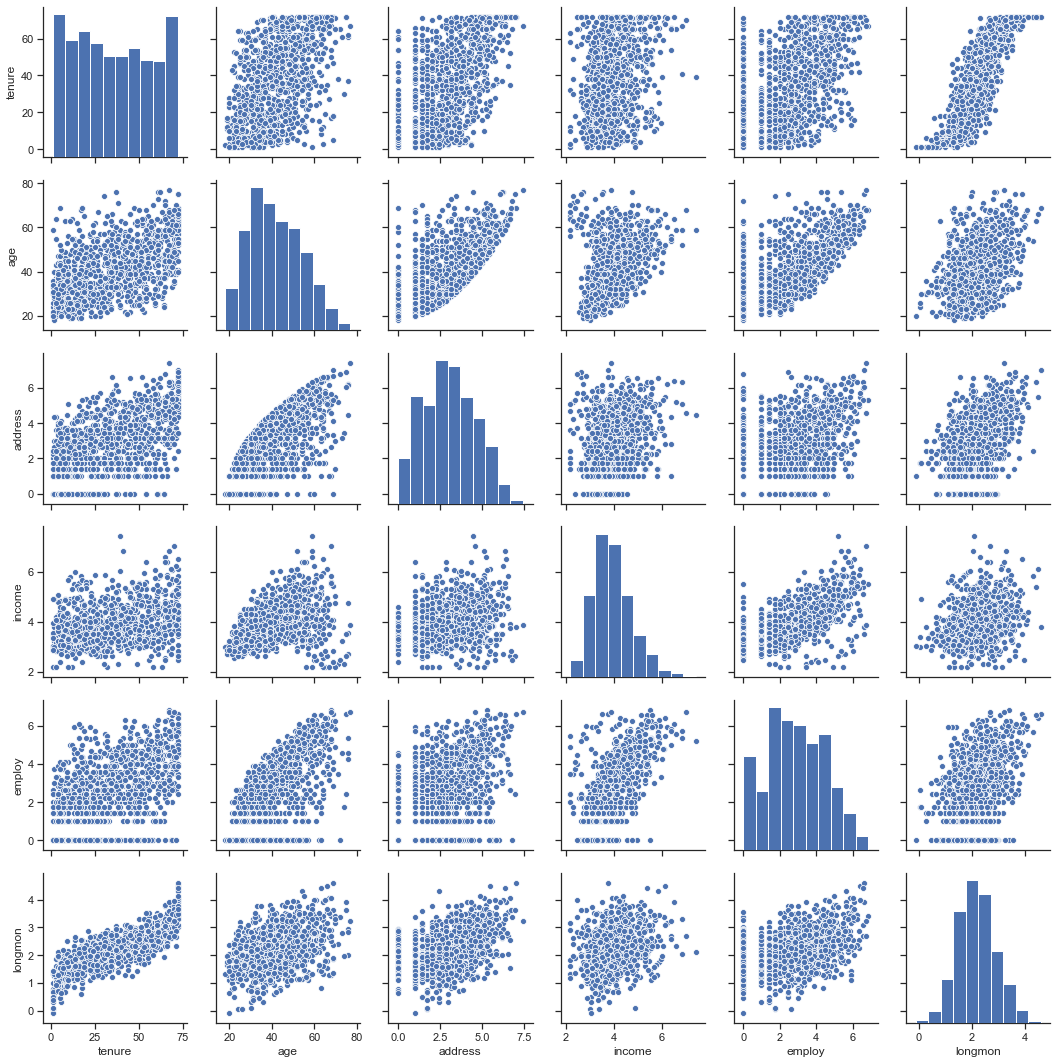

In [292]:
pair = sns.pairplot(data_transformed,
                 vars=[
                     'tenure', 'age', 'address', 'income', 'employ', 'longmon'
                 ])

After visualizing the data I decided to normalize all variables so it is easier 
 to interpret the coefficients of the model as they have same influence on the model

In [294]:
# normalize all variables, so it is easier 
# to interpret the coefficients of the model as they have same influence on the model
min_max_scaler = MinMaxScaler()
data_normed = pd.DataFrame(min_max_scaler.fit_transform(data_transformed))
data_normed.columns = data_transformed.columns
data_normed

,tenure,age,address,income,employ,longmon,wiremon_binary,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,0.169014,0.440678,0.404520,0.375641,0.326164,0.300145,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.140845,0.254237,0.356753,0.519983,0.326164,0.336933,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.943662,0.576271,0.660578,0.489523,0.785507,0.637794,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.450704,0.254237,0.467099,0.248802,0.000000,0.499227,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.309859,0.203390,0.404520,0.230551,0.206284,0.413142,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.126761,0.355932,0.000000,0.210375,0.000000,0.255619,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.084507,0.271186,0.190693,0.171159,0.326164,0.348666,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,0.929577,0.694915,0.852803,0.890992,0.837931,0.720143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,0.971831,0.525424,0.572078,0.434434,0.684167,0.710813,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**3.** After making up your decision about the above two problems run a simple linear
regression. Pick up one of the regressors. Write down the corresponding hypothesis of
the t-test. Provide the formula for the test statistics, explain the components of the
formula and give the values for this components. Evaluate the goodness of the model.
Explain in your own words the difference between R2 and adjusted R2.

In [279]:
# #this runs regression for all variables
# X = data_normed.drop(['longmon'], axis=1)
# y = data_normed.longmon
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# coefficients = reg.coef_
# coefficients


array([ 0.41604015, -0.02323792,  0.02799692,  0.04283643, -0.00665356,
       -0.00092816, -0.01505449,  0.05941622,  0.00729225, -0.00860684,
       -0.02141292, -0.00335178, -0.0240881 , -0.00662956, -0.0011252 ])

In [336]:
# add constant to fit intercept
data_const = sm.tools.tools.add_constant(data_normed)
X_single = data_const.drop(['longmon'], axis=1)
y_single = data_const.longmon
reg_statsmodel_single = sm.OLS(y_single, X_single).fit()
reg_statsmodel_single.summary()


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          5.13e-258
Time:                        22:27:13   Log-Likelihood:                 1070.3
No. Observations:                1000   AIC:                            -2111.
Df Residuals:                     985   BIC:                            -2037.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2820      0.011     25.611      0.000       0.260       0.304
tenure                              0.4160      0.012     35.697      0.000       0.393       0.439
age                                -0.0232      0.021     -1.115      0.265      -0.064       0.018
address                             0.0280      0.017      1.633      0.103      -0.006       0.062
income                              0.0428      0.028      1.549      0.122      -0.011       0.097
employ                             -0.0067      0.019     -0.345      0.730      -0.044       0.031
wiremon_binary                     -0.0014      0.006     -0.233      0.816      -0.014       0.011
marital_Unmarried                  -0.0151      0.005     -2.769      0.006      -0.026      -0.004
retire_Yes                          0.0594      0.016      3.652      0.000       0.027       0.091
gender_Male                         0.0073      0.005      1.368      0.172      -0.003       0.018
churn_Yes                          -0.0086      0.007     -1.312      0.190      -0.021       0.004
ed_Did not complete high school    -0.0214      0.009     -2.354      0.019      -0.039      -0.004
ed_High school degree              -0.0033      0.008     -0.426      0.670      -0.019       0.012
ed_Post-undergraduate degree       -0.0241      0.012     -2.056      0.040      -0.047      -0.001
ed_Some college                    -0.0066      0.008     -0.814      0.416      -0.023       0.009
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.570
Skew:                          -0.053   Prob(JB):                        0.277
Kurtosis:                       3.225   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**corresponding hypothesis of the t-test** - null hypothesis is that the coefficient of a given predictor variable is 0,so it has no effect on the Y.

pick one of regressors - **address**

In [323]:
# t-test done by hand
# convert the NumPy arrray to matrix
X_single = np.matrix( X_single )
 
# perform the matrix multiplication,
# and then take the inverse
C = np.linalg.inv( X_single.T.dot(X_single ))

# multiply by the MSE of the residual
C *= reg_statsmodel_single.mse_resid
 
# take the square root
SE = np.sqrt(C)
 
i = 3
beta = reg_statsmodel_single.params[i]
se = SE[i,i]
t = beta / se
print ('t =', t)

t = 1.6333941181293554


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Because for this variable P=0.103 that is more than $\alpha=0.05$, so we cannot reject the null hypothesis

**find goodness of the model**

$R^2$ squared here is 0.717

adjusted $R^2$ takes degreees of freedom into account

In [337]:
# predict = reg_statsmodel_single.predict(X)
# #y true - y predicted
# np.mean(sigma_squared)

In [300]:
# XXinv = np.linalg.inv(np.transpose(X).dot(X))

In [301]:
# beta = np.diagonal(np.mean(sigma_squared)*(XXinv))

In [338]:
#for one column find test
# t = (beta[3])/np.sqrt(beta[3])
# #todo: find p
# N = reg_statsmodel_single.nobs
# P = reg_statsmodel_single.df_model
# dof = N - P - 1
# hp = 1.0 - stat.t( dof ).cdf( t )
# p = hp * 2.0
# p

In [ ]:
# (beta[4] - 0)/np.sqrt(beta[4])

In [330]:
# # the total sum of squares.
# sigma_squared = (y - reg_statsmodel_single.predict(X))**2

# SST = (y - np.mean(y))**2

In [339]:
# sum(sigma_squared)/sum(SST)

In [340]:
# 1 - sum(sigma_squared)/sum(SST)

In [341]:
# reg_statsmodel_single.score(X_single, y_single)

**4.** Compute manually the predicted values from the above regression and the residuals.
Make two plots: residuals vs. true y's and predicted y's vs. true y's. What do you
expect in both cases and why? Do the obtained figures support your expectations?

expected - for all levels  variance of residuals doesnt change residulas vs predicted and true vs predicted

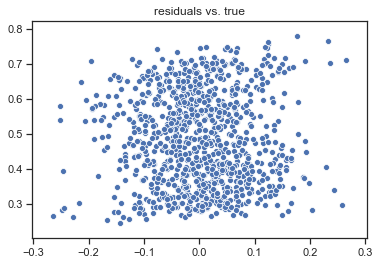

In [352]:
sns.scatterplot(y_single - reg_statsmodel_single.predict(X_single), reg_statsmodel_single.predict(X_single)).set_title("residuals vs. true")
plt.show()

Expected: Residuals are normally distributed around zero and they are eqaully dispersed on the plot

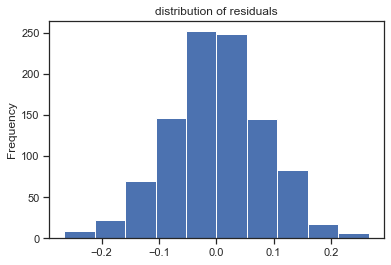

In [355]:
np.mean(y_single - reg_statsmodel_single.predict(X_single))
(y_single - reg_statsmodel_single.predict(X_single)).plot.hist().set_title("distribution of residuals")
plt.show()

they are equally distributed

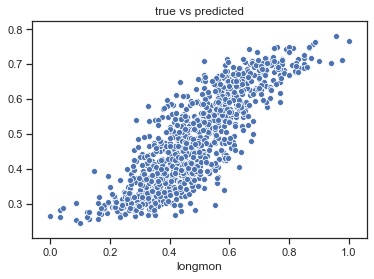

In [353]:
sns.scatterplot(y_single,reg_statsmodel_single.predict(X_single)).set_title("true vs predicted")
plt.show()

Expect them to be linear or almost linear

**5**

In [388]:
reg_statsmodel = sm.OLS(y_single, X_single).fit()
size = len(X_single.columns)
R = np.zeros((4, size))

R[0, 11] = 1
R[1, 12] = 1
R[2, 13] = 1
R[3, 14] = 1

reg_statsmodel.f_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.5345383]]), p=0.0388321647369176, df_denom=985, df_num=4>

In this test P-value shows that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
p is small m almost zero, so we reject H0, so dummy vars have impact

In [392]:
print("matrix is")
R

matrix is


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

vector is by default (0,0,0,0)

**6.**

**address** may mean how long the pace(customer) was served.  <br>
**ed** may influense the frequency of internet usage or long distance call usage <br>
**retire** may show amount of TV usage during the day as people that already left the job tent to spend a lot of time watching TV

**7** 
Compute the 95% confidence intervals for the parameters of address and income and
provide its economic meaning. Relate the CIs to the tests of significance, i.e. how
would you use these intervals to decide about the significance of the corresponding
explanatory variables? The CIs are computed relying on the assumption, that the
residuals follow normal distribution. Is this assumption fulfilled? Run an appropriate
goodness-of-fit test.

In [390]:
#view summary again
reg_statsmodel_single.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                longmon   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          5.13e-258
Time:                        23:14:50   Log-Likelihood:                 1070.3
No. Observations:                1000   AIC:                            -2111.
Df Residuals:                     985   BIC:                            -2037.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2820      0.011     25.611      0.000       0.260       0.304
tenure                              0.4160      0.012     35.697      0.000       0.393       0.439
age                                -0.0232      0.021     -1.115      0.265      -0.064       0.018
address                             0.0280      0.017      1.633      0.103      -0.006       0.062
income                              0.0428      0.028      1.549      0.122      -0.011       0.097
employ                             -0.0067      0.019     -0.345      0.730      -0.044       0.031
wiremon_binary                     -0.0014      0.006     -0.233      0.816      -0.014       0.011
marital_Unmarried                  -0.0151      0.005     -2.769      0.006      -0.026      -0.004
retire_Yes                          0.0594      0.016      3.652      0.000       0.027       0.091
gender_Male                         0.0073      0.005      1.368      0.172      -0.003       0.018
churn_Yes                          -0.0086      0.007     -1.312      0.190      -0.021       0.004
ed_Did not complete high school    -0.0214      0.009     -2.354      0.019      -0.039      -0.004
ed_High school degree              -0.0033      0.008     -0.426      0.670      -0.019       0.012
ed_Post-undergraduate degree       -0.0241      0.012     -2.056      0.040      -0.047      -0.001
ed_Some college                    -0.0066      0.008     -0.814      0.416      -0.023       0.009
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.570
Skew:                          -0.053   Prob(JB):                        0.277
Kurtosis:                       3.225   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

95% confidence intervals are given in summary of the OLS (cell above), so for address it is (-0.006	0.062) and for income it is (-0.011	0.097). 

The confidence interval is the the range of values we’d expect to find coeficient of the parameter. A smaller confidence interval suggests that we are confident about the value of the estimated coefficient. A larger confidence interval suggests that there is more uncertainty or variance in parameter

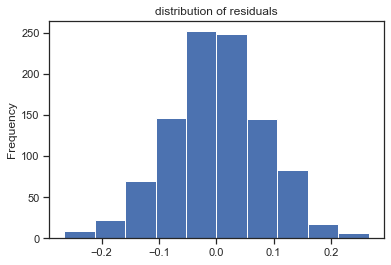

In [391]:
(y_single - reg_statsmodel_single.predict(X_single)).plot.hist().set_title("distribution of residuals")
plt.show()

In [395]:
stat.kstest(y_single - reg_statsmodel_single.predict(X_single),  'norm')

TypeError: kstest() missing 1 required positional argument: 'cdf'

distribution of residuals is normal around 0

P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than 0.05, it indicates that the variable affects the result, so CI.
So, significant variables are: *tenure,marital_Unmarried, retire_Yes, ed_Did not complete high school, ed_Post-undergraduate degree*. What is noticeable for them is that their CI does not include zero